In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df= pd.read_csv('UsedCarData.csv')

In [3]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [4]:
df.shape

(7906, 18)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   year               7906 non-null   int64  
 2   selling_price      7906 non-null   int64  
 3   km_driven          7906 non-null   int64  
 4   Region             7906 non-null   int32  
 5   State or Province  7906 non-null   int32  
 6   City               7906 non-null   int32  
 7   fuel               7906 non-null   int32  
 8   seller_type        7906 non-null   int32  
 9   transmission       7906 non-null   int32  
 10  owner              7906 non-null   int32  
 11  mileage            7906 non-null   float64
 12  engine             7906 non-null   int64  
 13  max_power          7906 non-null   float64
 14  torque             7906 non-null   float64
 15  seats              7906 non-null   int64  
 16  sold               7906 

In [6]:
df.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

In [7]:
df.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [8]:
le =LabelEncoder()

In [9]:
df.drop(columns=['name'],axis=1,inplace=True)

In [10]:
df['Region']=le.fit_transform(df['Region'])
df['State or Province']=le.fit_transform(df['State or Province'])
df['City']=le.fit_transform(df['City'])
df['fuel']=le.fit_transform(df['fuel'])
df['seller_type']=le.fit_transform(df['seller_type'])
df['transmission']=le.fit_transform(df['transmission'])
df['owner']=le.fit_transform(df['owner'])
df['sold']=le.fit_transform(df['sold'])


In [11]:
df['torque']=df['torque'].str.extract(r'(\d+)').astype(float)

In [12]:
df.head()

,Sales_ID,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,2014,450000,145500,1,7,1223,1,1,1,0,23.40,1248,74.00,190.0,5,1
1,2,2014,370000,120000,1,30,786,1,1,1,2,21.14,1498,103.52,250.0,5,1
2,3,2006,158000,140000,0,11,193,3,1,1,4,17.70,1497,78.00,12.0,5,1
3,4,2010,225000,127000,0,11,193,1,1,1,0,23.00,1396,90.00,22.0,5,1
4,5,2007,130000,120000,1,30,786,3,1,1,0,16.10,1298,88.20,11.0,5,1


<Figure size 1000x500 with 0 Axes>

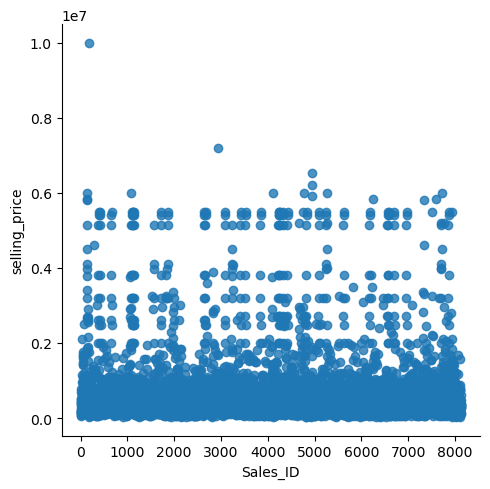

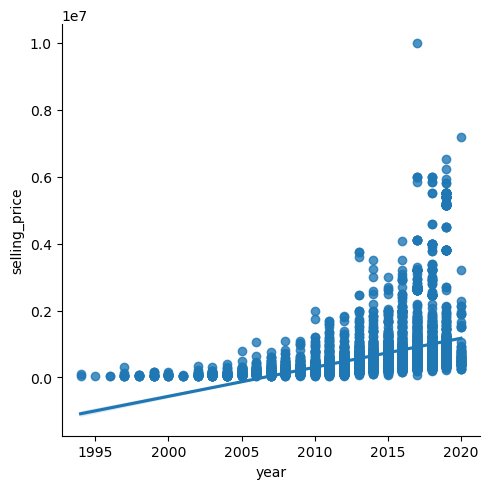

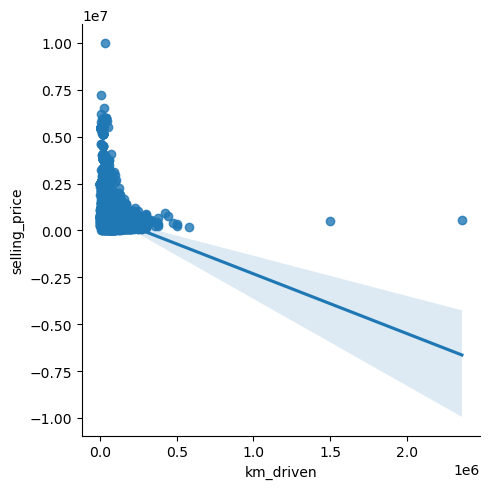

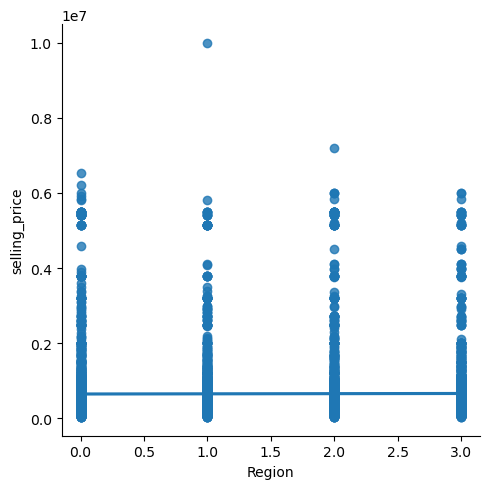

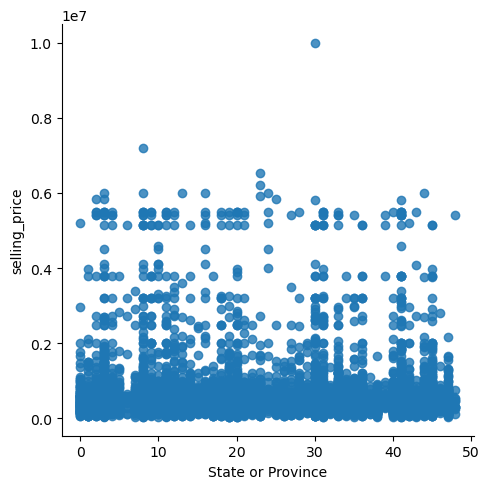

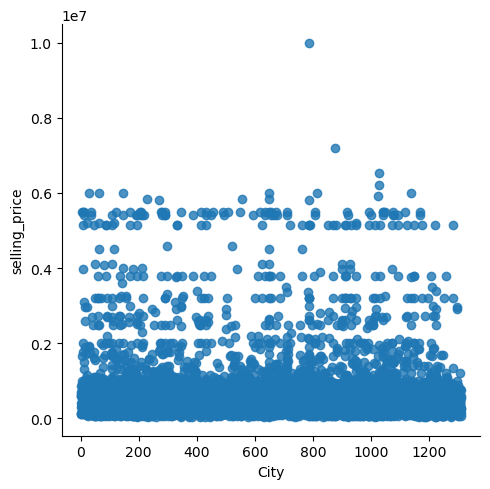

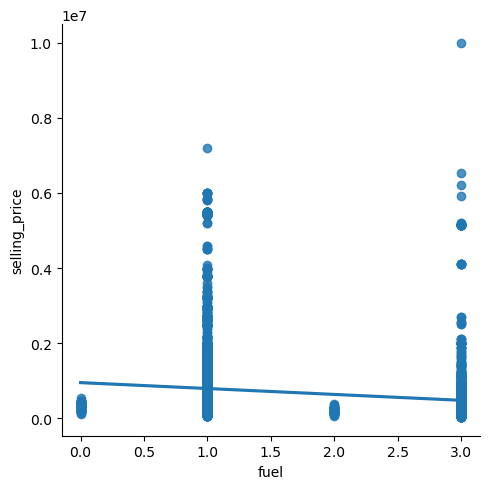

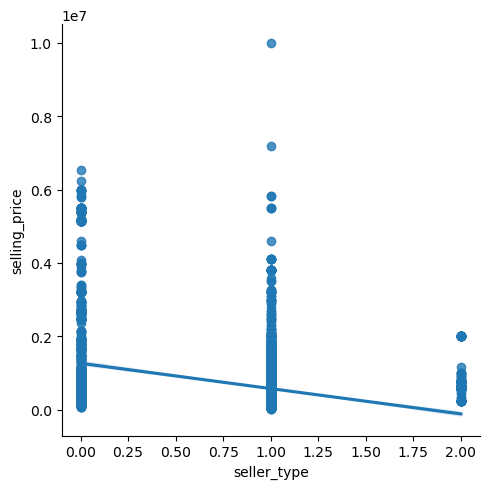

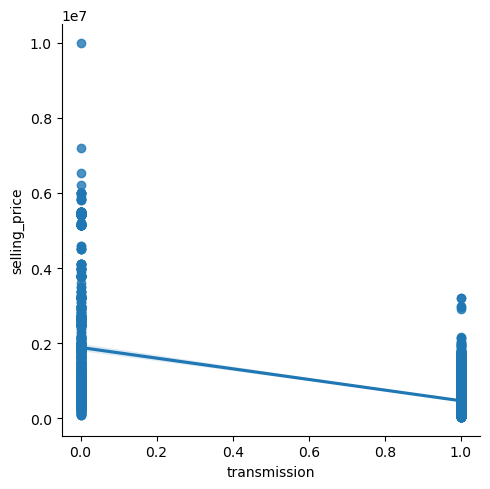

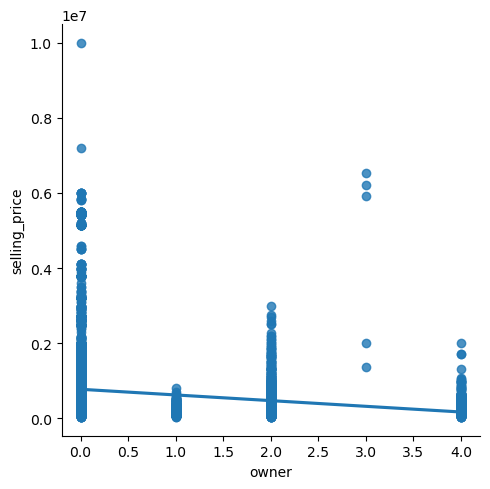

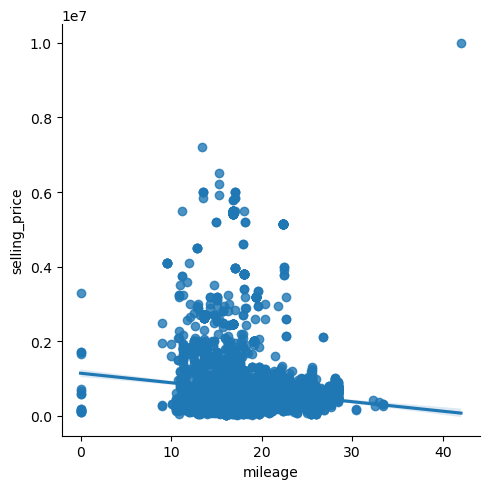

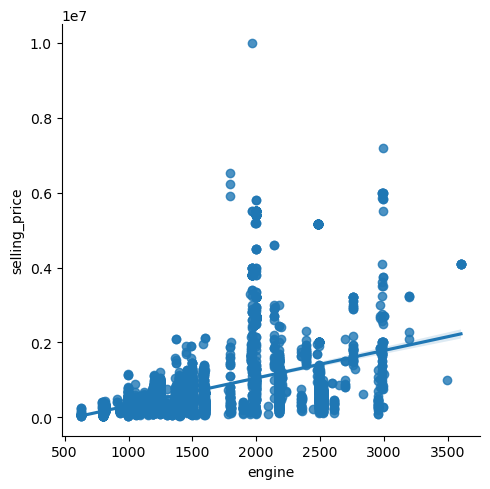

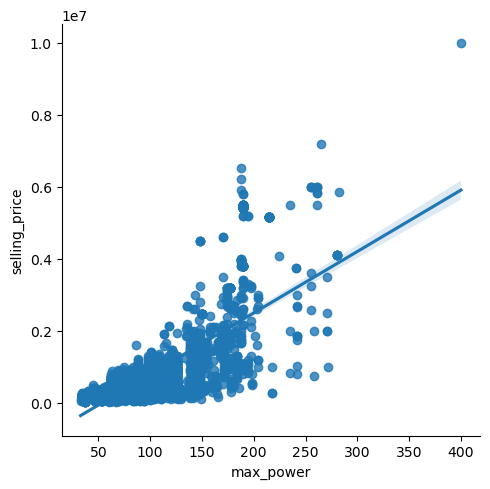

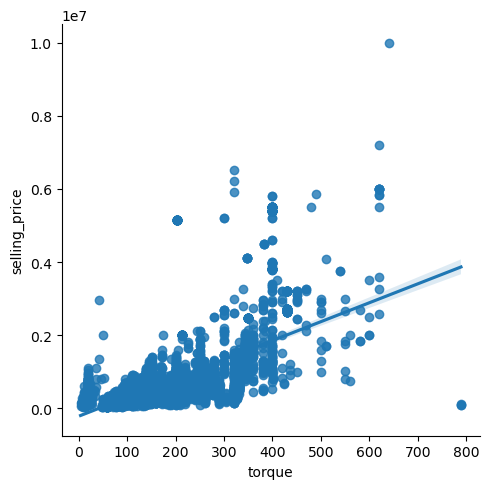

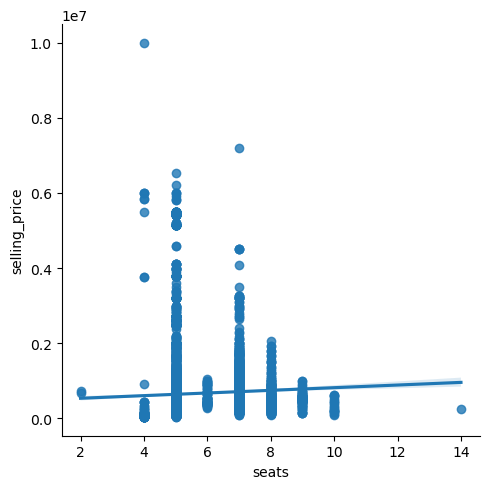

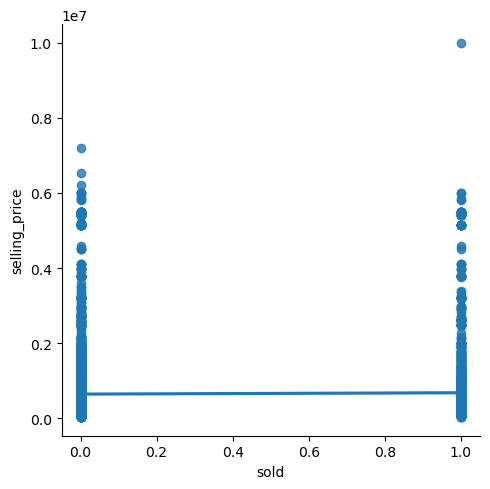

In [13]:
X = df.drop("selling_price", axis = 1)
Y = df.selling_price
plt.figure(figsize=(10,5))
X_cols = X.columns
for i in X_cols:
 sns.lmplot(data=df, x=i, y="selling_price")
plt.show()

In [14]:
x=df.drop(['selling_price'],axis=1)
y=df['selling_price']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
### Mean Absolute Error

In [34]:
lr=LinearRegression()

In [80]:
lr.fit(x_train,y_train)

LinearRegression()

In [90]:
accuracy_lr = lr.score(x_test, y_test)
print("Accuracy of the model: ", accuracy_lr)


Accuracy of the model:  0.6829548278222397


In [91]:
y_pred = lr.predict(x_test)

In [92]:
Me = mean_absolute_error(y_test,y_pred)

In [89]:
Me

276559.68843201833

### RandomForestRegressor

In [66]:
Re = RandomForestRegressor()

In [67]:
Re.fit(x_train,y_train)

RandomForestRegressor()

In [68]:
y_predRe = Re.predict(x_test)

In [69]:
Me1 = mean_absolute_error(y_test,y_predRe)

In [71]:
Me1

74684.61632111252

In [93]:
accuracy_Re = Re.score(x_test, y_test)
print("Accuracy of the model: ", accuracy_Re)

Accuracy of the model:  0.9677238181621433


### DecisionTreeRegressor

In [99]:
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
accuracy_DT = DT.score(x_test, y_test)
print("Accuracy of the model: ", accuracy_DT)

Accuracy of the model:  0.9496552778018092


In [110]:
y_predDT = DT.predict(x_test)

In [111]:
Me2 = mean_absolute_error(y_test,y_predDT)

In [112]:
Me2

92642.94753476612